In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Austin\Downloads\Walmart_Sales.csv")

In [8]:
group_a = df.groupby(['City', 'Branch']).agg({'Unit price': 'sum', 'Quantity': 'sum'})

In [9]:
group_a['Total Sales'] = group_a['Unit price']* group_a['Quantity']

In [10]:
print(group_a)

                  Unit price  Quantity  Total Sales
City      Branch                                   
Mandalay  A          6349.11     637.0   4044383.07
          B          6623.73     664.0   4398156.72
          C          5506.04     519.0   2857634.76
Naypyitaw A          5953.55     648.0   3857900.40
          B          6298.64     604.0   3804378.56
          C          6315.57     579.0   3656715.03
Yangon    A          6342.88     598.0   3793042.24
          B          6329.25     631.0   3993756.75
          C          5953.36     630.0   3750616.80


In [11]:
avg_price= df.groupby(['City', 'Branch']).agg({'Unit price':'mean'})

In [12]:
print(avg_price)

                  Unit price
City      Branch            
Mandalay  A        53.353866
          B        56.133305
          C        57.958316
Naypyitaw A        54.123182
          B        57.785688
          C        57.941009
Yangon    A        55.639298
          B        56.011062
          C        52.684602


In [21]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
apr_data= df[df['Date'].dt.month == 3]

In [28]:
apr_sales_perform= apr_data.groupby(['Product line', 'Gender', 'Payment']).agg({'Unit price': 'sum', 'Quantity': 'sum'})

In [29]:
apr_sales_perform['Total sale']= apr_sales_perform['Unit price']* apr_sales_perform['Quantity']

In [30]:
print(apr_sales_perform)

                                           Unit price  Quantity  Total sale
Product line           Gender Payment                                      
Electronic accessories Female Cash             622.23      51.0    31733.73
                              Credit card      532.72      56.0    29832.32
                              Ewallet          320.02      41.0    13120.82
                       Male   Cash             695.15      94.0    65344.10
                              Credit card      160.67      22.0     3534.74
                              Ewallet          883.83      61.0    53913.63
Fashion accessories    Female Cash             325.61      24.0     7814.64
                              Credit card      658.92      73.0    48101.16
                              Ewallet          395.93      51.0    20192.43
                       Male   Cash             727.72      50.0    36386.00
                              Credit card      339.50      34.0    11543.00
            

C:\Users\Austin\AppData\Local\Temp\ipykernel_6556\2567898031.py:4: FutureWarning: The provided callable <function sum at 0x00000110A6B2F380> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(grouped_monthly_performance, values='Total Sales', index=['Month', 'Product line'], columns='Gender', aggfunc=np.sum, fill_value=0)


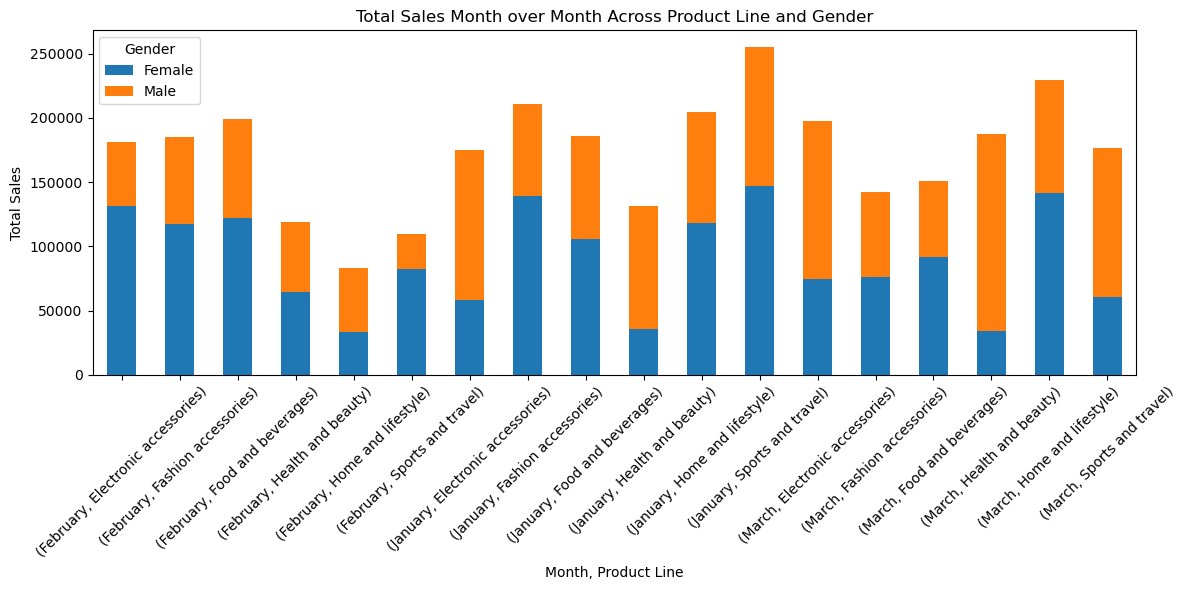

In [75]:


grouped_monthly_performance = monthly_performance.groupby(['Month', 'Product line', 'Gender']).agg({'Total Sales': 'sum'}).reset_index()

# Pivot the data to prepare for the stacked bar chart
pivot_table = pd.pivot_table(grouped_monthly_performance, values='Total Sales', index=['Month', 'Product line'], columns='Gender', aggfunc=np.sum, fill_value=0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels and title
plt.title('Total Sales Month over Month Across Product Line and Gender')
plt.xlabel('Month, Product Line')
plt.ylabel('Total Sales')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding legend
plt.legend(title='Gender')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


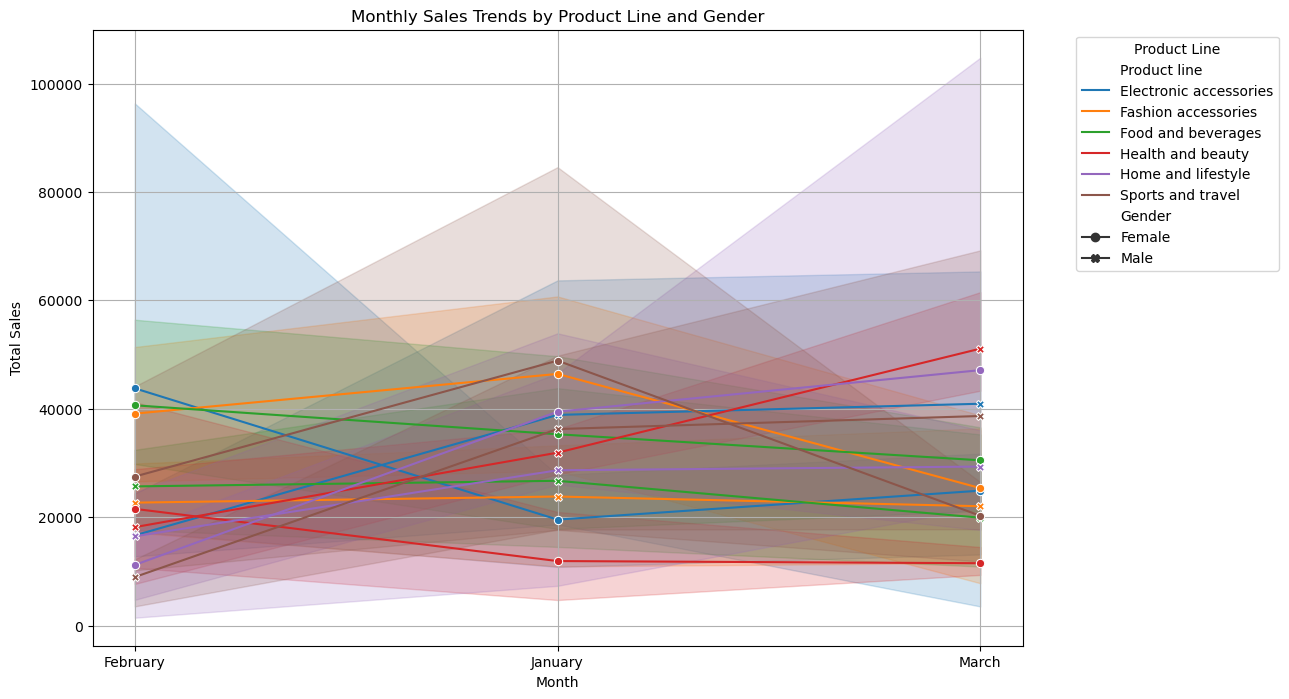

C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


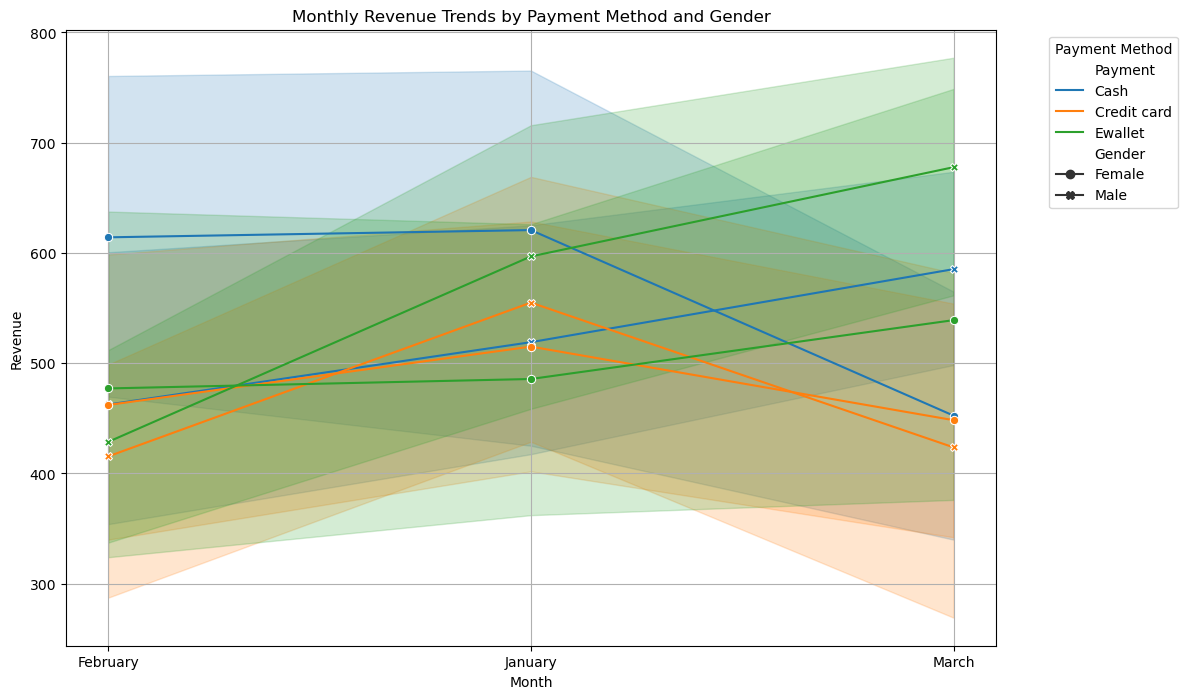

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month.map({1: 'January', 2: 'February', 3: 'March', 4: 'April'})

monthly_sales_performance = df.groupby(['Year', 'Month', 'Product line', 'Gender', 'Payment']).agg({'Unit price': 'sum', 'Quantity': 'sum'})

monthly_sales_performance['Total Sales'] = monthly_sales_performance['Unit price'] * monthly_sales_performance['Quantity']

monthly_sales_performance.reset_index(inplace=True)

plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_sales_performance, x='Month', y='Total Sales', hue='Product line', style='Gender', markers=True, dashes=False)
plt.title('Monthly Sales Trends by Product Line and Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_sales_performance, x='Month', y='Unit price', hue='Payment', style='Gender', markers=True, dashes=False)
plt.title('Monthly Revenue Trends by Payment Method and Gender')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Austin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: Futu

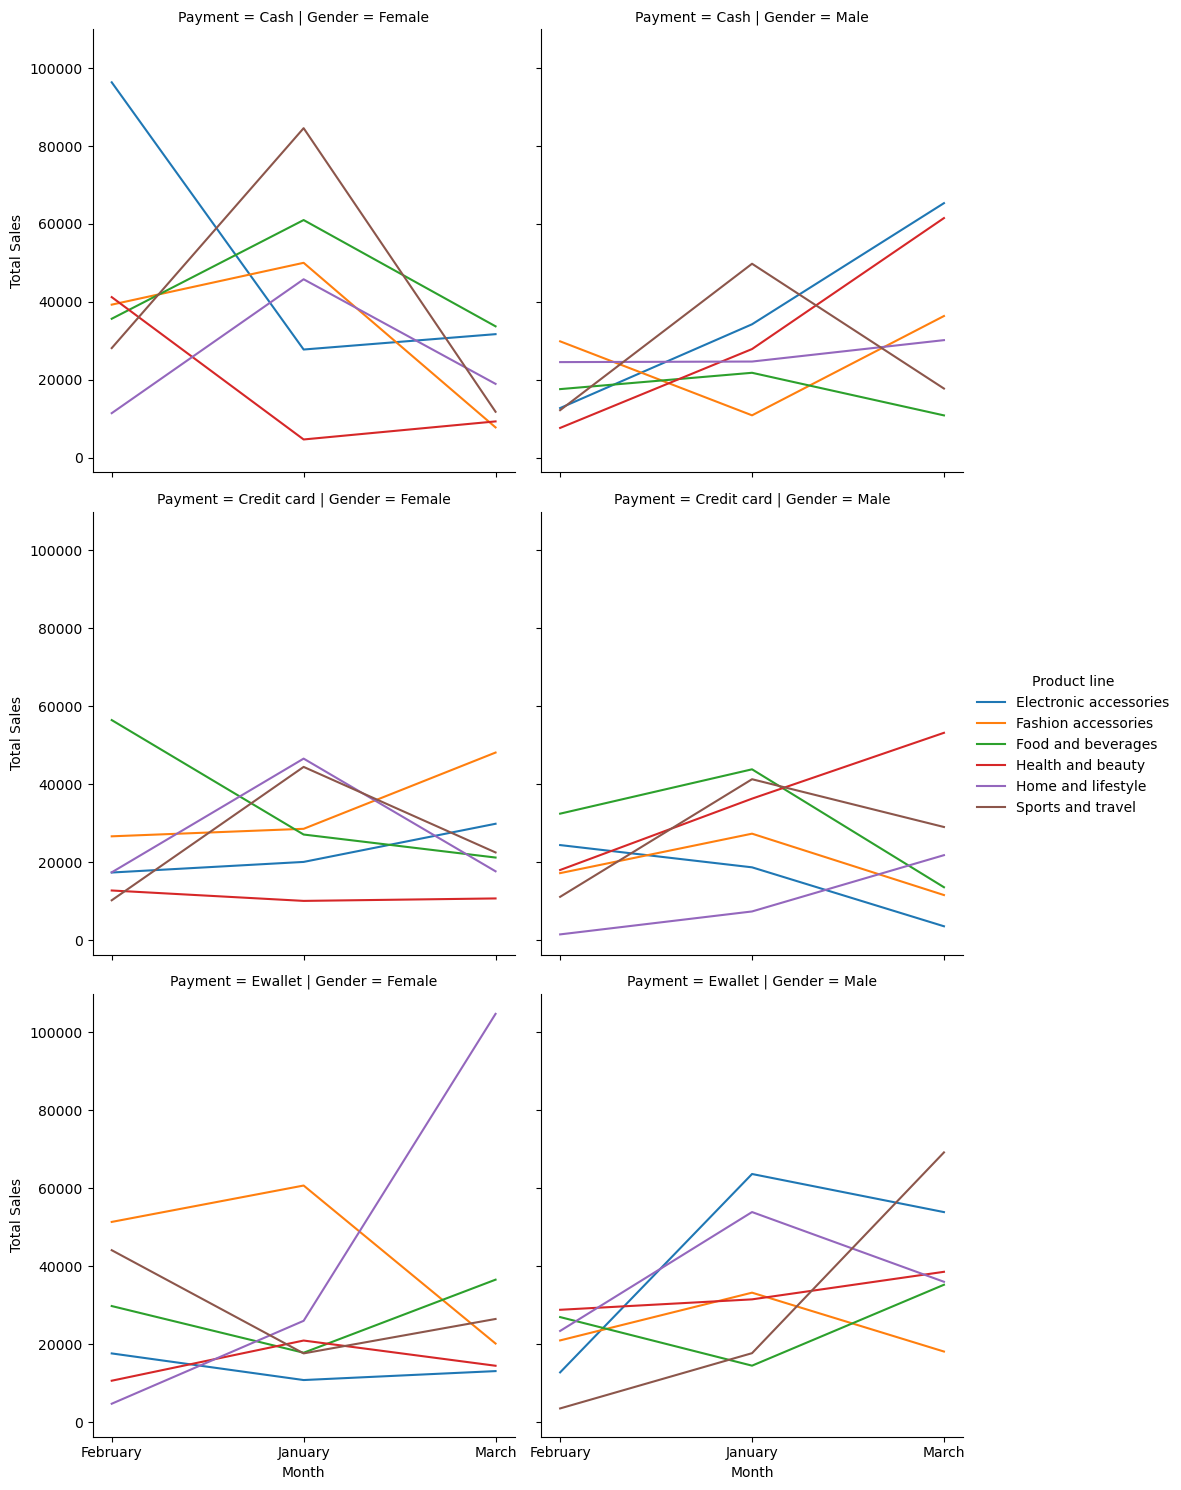

In [76]:
df['Month'] = df['Date'].dt.month.map({1: 'January', 2: 'February', 3: 'March', 4: 'April'})
monthly_performance = df.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({'Unit price': 'sum', 'Quantity': 'sum'})
monthly_performance['Total Sales'] = monthly_performance['Unit price'] * monthly_performance['Quantity']
monthly_performance = monthly_performance.reset_index()
sns.relplot(x='Month', y='Total Sales', hue='Product line', col='Gender', row='Payment', kind='line', data=monthly_performance, estimator=sum, ci=None)
plt.show()